**Q.** Suppose you manage n factories, each producing si amount of goods for i = 1, 2, . . . , n. These goods
need to be shipped to m destinations, each having a demand di for i = 1, 2, . . . , m, and our goal is to
move the goods from the factories to the destinations so as to satisfy the demand. However, there is a
cost associating to moving the goods: for moving a unit good from factory i to destination j, the cost
involved is cij . Our goal is to decide the amount of quantities to be shipped from each factory to each
destination such that the demand is satisfied, and the overall cost is minimized. We assume that the
goods are divisible (so the quantity shipped does not have to be an integer), and that the shipping is
directly to the respective destinations (meaning there is no routing involved).

**(a)** Formulate the problem above as an LP, and write a CVX/CVXPY code to compute the quantities
shipped.

**(b)** Find the optimal transportation strategy for the following costs, supply and demands:

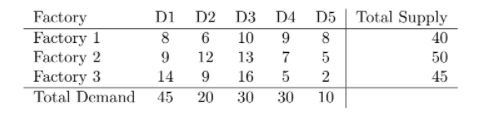

In [91]:
import cvxpy as cp
import numpy as np
import sympy as sy


In [92]:
#Number of Factories
n=3         
#Number of Destinations
m=5
#Initialization of all 1 matrices for later use
one_mat_1=np.ones((n,1))
one_mat_2=np.ones((m,1))

In [93]:
# Travelling charge per unit from factory i to Destination j
c=np.matrix([[8, 6, 10, 9, 8],[ 9, 12, 13, 7, 5],[ 14, 9, 16, 5, 2]])

#Total Supply
s=np.matrix([[40],[50],[45]])

#Total Demand 
d=np.matrix([[45],[20],[30],[30],[10]])


In [94]:
# Initializing unit matrix
x = cp.Variable((n,m))
p=x@c.T

#Penalty Function
f=cp.trace(p)


In [95]:
Objective = cp.Minimize(f)
Constraints = [x@one_mat_2<=s, ((x.T@one_mat_1))>= d, x>= 0]


In [96]:
prob = cp.Problem(Objective, Constraints)
prob.solve()

print("Optimal Quantities Shipped:",x.value)
print("Optimal Cost",cp.trace(x@c.T).value)


Optimal Quantities Shipped: [[7.77167223e-09 1.50000000e+01 2.50000000e+01 1.19073829e-09
  3.61593415e-11]
 [4.50000000e+01 8.72313200e-09 4.99999999e+00 6.65874022e-09
  3.28453016e-09]
 [3.32563615e-09 5.00000000e+00 9.35542298e-09 3.00000000e+01
  1.00000000e+01]]
Optimal Cost 1025.0000000955836
